In [256]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pymongo import MongoClient
from io import StringIO 
from IPython.display import Image 
import pydotplus
from sklearn import preprocessing
from sklearn import tree
import pickle

%matplotlib inline

client = MongoClient("localhost", 27017, maxPoolSize=50)
db = client.book
collection = db['FullTimeMatchesWithStats']
cursor = collection.find()
df =  pd.DataFrame(list(cursor))
pd.set_option('display.max_rows', 5000)
pd.options.display.max_columns = None

df = df[ (df.differenceAt75<3)  & (df.differenceAt75>-3) ]
#df = df[ (df.league_name == 'Eredivisie')]

dfYes = df[df.goalScoredLast15 == True]
dfNo = df[df.goalScoredLast15 == False]
print( "Yes Count:" +  str(len(dfYes)) )
print( "No Count:" + str(len(dfNo)) )
print(len(dfYes) / (len(dfNo)+len(dfYes)))


df = df[[ 
                                         'startingatwithtime'
                                        ,'hometeamname'
                                        ,'awayteamname'
                                         ,'homeGoalsUpTo75'
                                        ,'awayGoalsUpTo75'
                                         ,'homeyellowUpTo75'
                                        ,'awayyellowUpTo75'
                                        ,'resultAt45'
                                        ,'differenceAt75'
                                        ,'differenceAt60'
                                        ,'reddifferenceAt75'
    
                                        ,'resultChangedAt75'
                                        
                                        ,'twoGoalsScoredLast45'
                                         
                        
                                        ,'differenceAt45'
                                        ,'reddifferenceAt45'
                              
                                        ,'resultChangedAt45'
                                        ,'resultChangedAt75'
                                      
                        
                                        ,'AwayAttacks74'
                                        ,'AwayCorners74'
                                        ,'AwayDangerousAttacks74'
                                        ,'AwayShotsOffGoal74'
                                        ,'AwayShotsOnGoal74'
                                       #  ,'AwayFouls74'
    
                                      #  ,'HomeFouls74'
                                        ,'HomeAttacks74'
                                        ,'HomeCorners74'
                                        ,'HomeDangerousAttacks74'
                                        ,'HomeShotsOffGoal74'
                                        ,'HomeShotsOnGoal74'
                                        
                                        ,'HomePossesionTime74'
                              
    
    
                                        ,'AwayAttacks59'
                                        ,'AwayCorners59'
                                        ,'AwayDangerousAttacks59'
                                        ,'AwayShotsOffGoal59'
                                        ,'AwayShotsOnGoal59'
                                       # ,'AwayFouls59'
                                   
                                        ,'HomeAttacks59'
                                        ,'HomeCorners59'
                                        ,'HomeDangerousAttacks59'
                                        ,'HomeShotsOffGoal59'
                                        ,'HomeShotsOnGoal59'
                                        #,'HomeFouls59'
                                   
                                        ,'homeGoals45To75'
                                        ,'awayGoals45To75'                         
                                        ,'homeYellows59To75'
                                        ,'awayYellows59To75'                     
                                    
                                        ,'minuteOfLastGoalAt75'
                                        ,'goalScoredLast15'
                               
                                        ,'AwayTeamRunningPointAverage'
                                        ,'HomeTeamRunningPointAverage'
                                       
                                        ,'HomeTeamWhileHomeAverageAttack'
                                        ,'HomeTeamWhileHomeAverageDefence'
                                        ,'AwayTeamWhileAwayAverageAttack'  
                                        ,'AwayTeamWhileAwayAverageDefence'
                                       ,'league_name'
                                      ]].copy()
        
df = df.dropna()



df = df.convert_objects(convert_numeric=True)




df['DiffAwayAttacks74to59'] = df.AwayAttacks74 - df.AwayAttacks59
df['DiffAwayCorners74to59'] = df.AwayCorners74 - df.AwayCorners59      
df['DiffAwayDangerousAttacks74to59'] = df.AwayDangerousAttacks74 - df.AwayDangerousAttacks59     
df['DiffAwayShotsOffGoal74to59'] = df.AwayShotsOffGoal74 - df.AwayShotsOffGoal59      
df['DiffAwayShotsOnGoal74to59'] = df.AwayShotsOnGoal74 - df.AwayShotsOnGoal59
#df['DiffAwayFouls74to59'] = df.AwayFouls74 - df.AwayFouls59

df['DiffHomeAttacks74to59'] = df.HomeAttacks74 - df.HomeAttacks59
df['DiffHomeCorners74to59'] = df.HomeCorners74 - df.HomeCorners59      
df['DiffHomeDangerousAttacks74to59'] = df.HomeDangerousAttacks74 - df.HomeDangerousAttacks59      
df['DiffHomeShotsOffGoal74to59'] = df.HomeShotsOffGoal74 - df.HomeShotsOffGoal59     
df['DiffHomeShotsOnGoal74to59'] = df.HomeShotsOnGoal74 - df.HomeShotsOnGoal59
#df['DiffHomeFouls74to59'] = df.HomeFouls74 - df.HomeFouls59


dfYes = df[df.goalScoredLast15 == True]
dfNo = df[df.goalScoredLast15 == False]
print(len(df))
print( "Yes Count:" +  str(len(dfYes)) )
print( "No Count:" + str(len(dfNo)) )


#bucketize 
#df['DiffHomeDangerousAttacks74to59'] = pd.qcut(df['DiffHomeDangerousAttacks74to59'], 4, labels=False)
#df['DiffAwayDangerousAttacks74to59'] = pd.qcut(df['DiffAwayDangerousAttacks74to59'], 4, labels=False)
#df['HomePossesionTime74'] = pd.qcut(df['HomePossesionTime74'], 6, labels=False)
#df['AwayTeamRunningPointAverage'] = pd.qcut(df['AwayTeamRunningPointAverage'], 5, labels=False)
#df['HomeTeamRunningPointAverage'] = pd.qcut(df['HomeTeamRunningPointAverage'], 5, labels=False)


#df['HomeTeamWhileHomeAverageAttack'] = pd.qcut(df['HomeTeamWhileHomeAverageAttack'], 5, labels=False)
#df['HomeTeamWhileHomeAverageDefence'] = pd.qcut(df['HomeTeamWhileHomeAverageDefence'], 5, labels=False)

#df['AwayTeamWhileAwayAverageAttack'] = pd.qcut(df['AwayTeamWhileAwayAverageAttack'], 5, labels=False)
#df['AwayTeamWhileAwayAverageDefence'] = pd.qcut(df['AwayTeamWhileAwayAverageDefence'], 5, labels=False)
#df['minuteOfLastGoalAt75'] = pd.qcut(df['minuteOfLastGoalAt75'],5, labels=False)
#df['DiffAwayAttacks74to59'] = pd.qcut(df['DiffAwayAttacks74to59'], 5, labels=False)
#df['DiffHomeAttacks74to59'] = pd.qcut(df['DiffHomeAttacks74to59'], 5, labels=False)
#df['DiffAwayFouls74to59'] = pd.qcut(df['DiffAwayFouls74to59'], 3, labels=False)
#df['DiffHomeFouls74to59']  = pd.qcut(df['DiffHomeFouls74to59'], 3, labels=False)



feature_cols = [                       
                    
    
                                      'DiffAwayAttacks74to59'
                                      ,'DiffAwayCorners74to59' 
                                      ,'DiffAwayDangerousAttacks74to59'      
                                      ,'DiffAwayShotsOffGoal74to59'
                                     ,'DiffAwayShotsOnGoal74to59'
                                    #  ,'DiffAwayFouls74to59'
    
                                      ,'DiffHomeAttacks74to59'
                                      ,'DiffHomeCorners74to59'    
                                      ,'DiffHomeDangerousAttacks74to59' 
                                      ,'DiffHomeShotsOffGoal74to59'      
                                      ,'DiffHomeShotsOnGoal74to59'
                                      # ,'DiffHomeFouls74to59'
                                    
                                       ,'homeGoals45To75'
                                       ,'awayGoals45To75'                         
                                        ,'homeYellows59To75'
                                        ,'awayYellows59To75'                     
                                       ,'minuteOfLastGoalAt75'
                                        ,'HomePossesionTime74'
                                        ,'differenceAt75'
                                        ,'differenceAt60'
                                       ,'differenceAt45'
#y = df.goalScoredLast15 # Target variable
                                        
         
                                        
                                       ,'AwayTeamRunningPointAverage'
                                       ,'HomeTeamRunningPointAverage'
                                      
                               
                                        ,'HomeTeamWhileHomeAverageAttack'
                                        ,'HomeTeamWhileHomeAverageDefence'
                                        ,'AwayTeamWhileAwayAverageAttack'  
                                        ,'AwayTeamWhileAwayAverageDefence'
                        
                         # ,'AwayFouls74'
                                      
    
                                    
                                                #  ,'HomeFouls74'
                                                #  ,'AwayFouls74'
                              
                               
                                    
               ]
                                        
    

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
data = df
                                        
X = df[feature_cols] # Features
y = df.goalScoredLast15 # Target variable

#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(f_classif, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(35,'Score')) 
            

Yes Count:569
No Count:750
0.4313874147081122
1205
Yes Count:523
No Count:682
                              Specs     Score
11                  awayGoals45To75  6.604261
3        DiffAwayShotsOffGoal74to59  5.074954
18                   differenceAt45  2.913827
21   HomeTeamWhileHomeAverageAttack  2.820571
14             minuteOfLastGoalAt75  2.141553
4         DiffAwayShotsOnGoal74to59  1.453855
22  HomeTeamWhileHomeAverageDefence  1.310023
6             DiffHomeCorners74to59  1.005431
2    DiffAwayDangerousAttacks74to59  0.742099
7    DiffHomeDangerousAttacks74to59  0.591167
1             DiffAwayCorners74to59  0.555588
19      AwayTeamRunningPointAverage  0.443020
24  AwayTeamWhileAwayAverageDefence  0.273474
13                awayYellows59To75  0.262913
12                homeYellows59To75  0.189359
9         DiffHomeShotsOnGoal74to59  0.179280
20      HomeTeamRunningPointAverage  0.137972
0             DiffAwayAttacks74to59  0.055539
5             DiffHomeAttacks74to59  0.037723
8 

/home/darth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:112: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


size: 1205
Accuracy: 0.5303867403314917


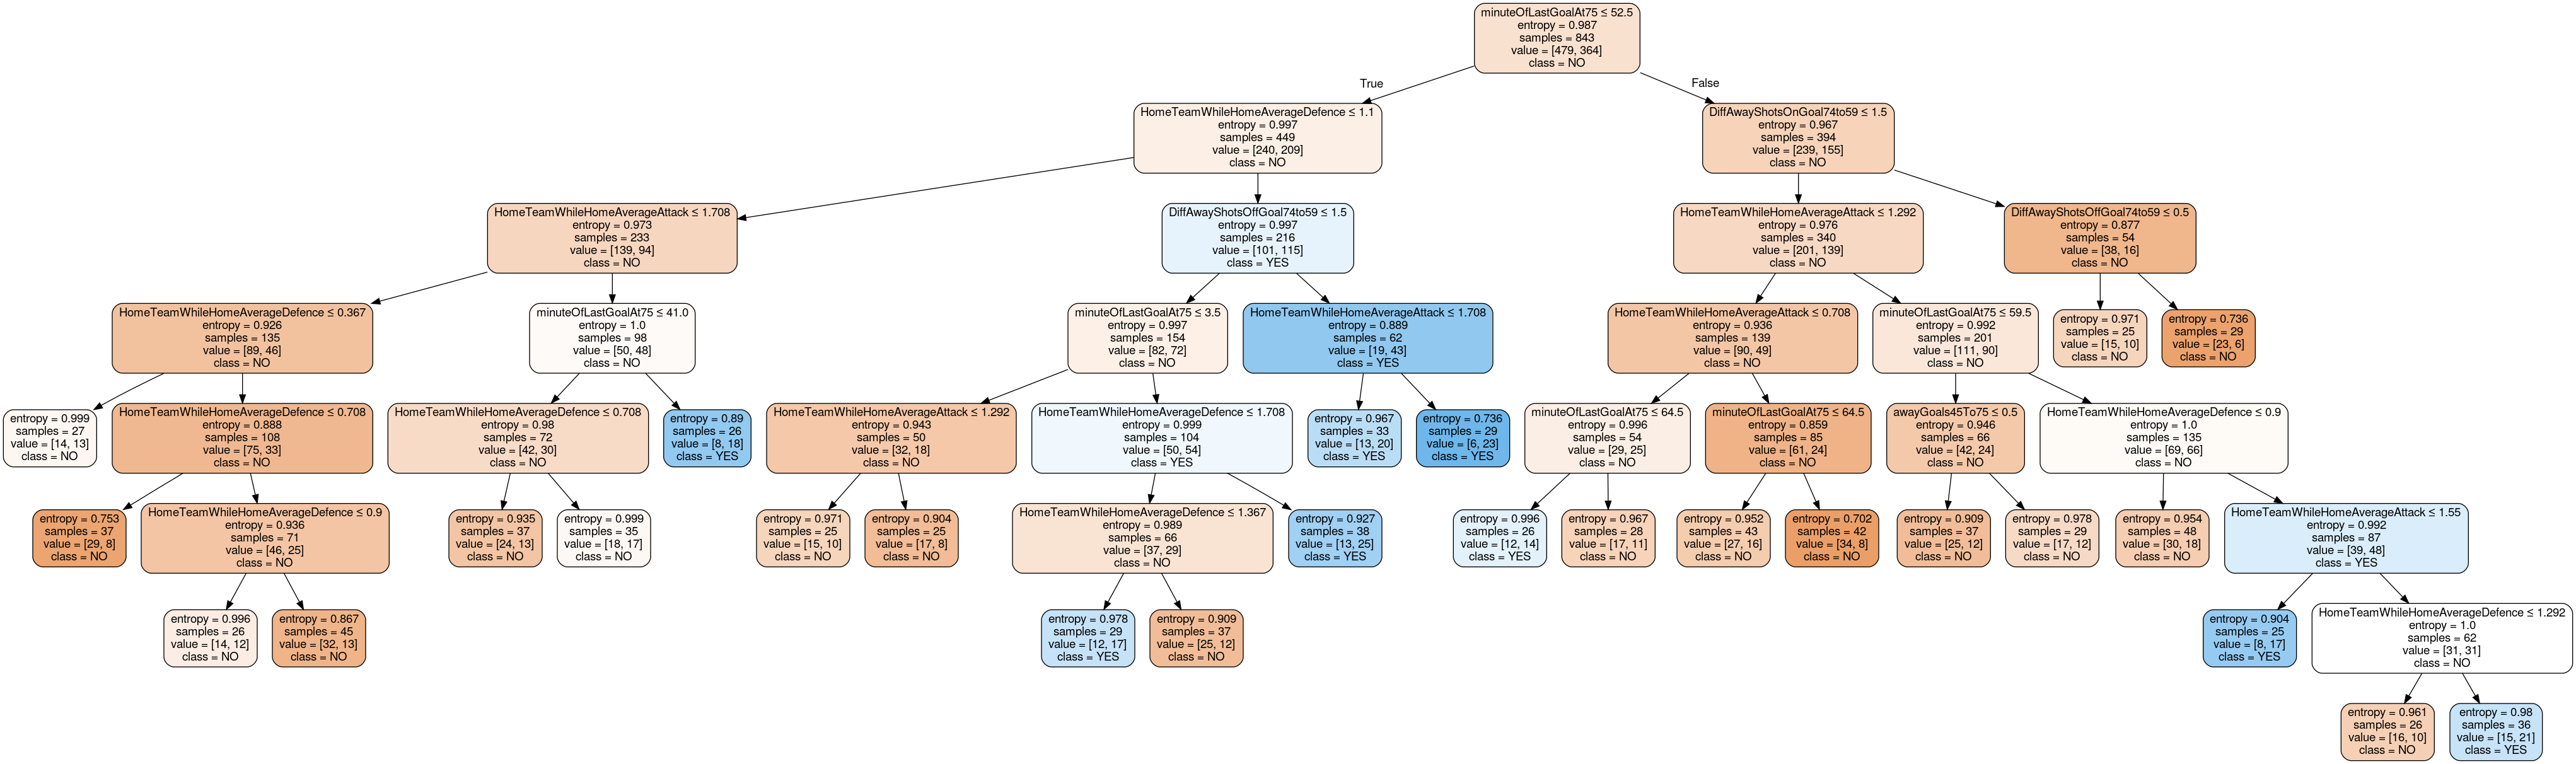

In [247]:


feature_cols = [                       
                 #'DiffHomeFouls74to59',
                 'DiffAwayShotsOnGoal74to59',
                 'awayGoals45To75',
                 #'DiffAwayFouls74to59',
                 'differenceAt45',
                 'DiffAwayShotsOffGoal74to59',
                 'HomeTeamWhileHomeAverageAttack',
                 'HomeTeamWhileHomeAverageDefence',
                 'differenceAt45',
                 'minuteOfLastGoalAt75',
                 #'DiffAwayShotsOnGoal74to59'
]

import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())



X = df[feature_cols] # Features
y = df.goalScoredLast15 # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",max_depth=20,min_samples_leaf =25)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)


print("size:",len(df))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

plot_decision_tree(clf, X_train.columns,['NO','YES'])


In [249]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=9,min_samples_leaf =25,criterion="entropy")
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc




/home/darth/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.4847834204630321

In [250]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=750, random_state=0)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[178  28]
 [138  18]]
              precision    recall  f1-score   support

         0.0       0.56      0.86      0.68       206
         1.0       0.39      0.12      0.18       156

    accuracy                           0.54       362
   macro avg       0.48      0.49      0.43       362
weighted avg       0.49      0.54      0.46       362



In [251]:

from sklearn.model_selection  import train_test_split 
from sklearn.metrics import confusion_matrix 

X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.3, random_state=42)
from sklearn.linear_model import LogisticRegression 
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
from sklearn.metrics import classification_report 
predictions = logmodel.predict(X_test)





/home/darth/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [254]:
print(classification_report(y_test,predictions))



              precision    recall  f1-score   support

         0.0       0.56      0.88      0.69       203
         1.0       0.45      0.13      0.20       159

    accuracy                           0.55       362
   macro avg       0.51      0.50      0.44       362
weighted avg       0.52      0.55      0.47       362



In [255]:
print(confusion_matrix(y_test,predictions))

[[179  24]
 [139  20]]
